# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

<hr>

In [3]:
# Import data
talks = pd.read_csv("ted_main.csv")
talks

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

In [37]:
len(set(talks["main_speaker"]))

2156

In [3]:
talks.isnull().any() # Check for null values, resuts: speaker_occupation

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
dtype: bool

In [9]:
talks = talks.drop(["url"], axis = 1)

In [10]:
# Title Length
tl = []
titles = talks["title"]
for t in titles:
    tl.append(len(t))
talks["titleLength"] = tl

In [11]:
# Number of tags
nt = []
tags = talks["tags"]
for n in tags:
    n = eval(n)
    nt.append(len(n))
talks["numTags"] = nt

In [12]:
# Length of description
d = []
dec = talks["description"]
for s in dec:
    d.append(len(s))
    
talks["descLength"] = d

In [25]:
# Split data into different "popularity ranks"
rank1 = talks[talks["views"] > 10000000]  # 10 million views plus
rank2 = talks[(talks["views"] <= 10000000) & (talks["views"] > 500000)]  # 5mill - 10mil
rank3 = talks[(talks["views"] <= 500000) & (talks["views"] > 100000)]  # 1mill - 5mil
rank4 = talks[(talks["views"] <= 100000) ]  # Under 1 mil

ranked = [rank1, rank2, rank3, rank4]

In [26]:
len(rank1)

34

In [27]:
len(rank2)

2237

In [29]:
len(rank3)

276

In [30]:
len(rank4)

3

In [128]:
rank3.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,titleLength,numTags,descLength
11,55,Jehane Noujaim unveils her 2006 TED Prize wish...,1538,TED2006,1140912000,20,Jehane Noujaim,Jehane Noujaim: My wish: A global day of film,1,1153786260,"[{'id': 1, 'name': 'Beautiful', 'count': 70}, ...","[{'id': 2228, 'hero': 'https://pe.tedcdn.com/i...",Filmmaker,"['TED Prize', 'art', 'culture', 'entertainment...",My wish: A global day of film,387877,29,10,121
14,99,"Nicholas Negroponte, founder of the MIT Media ...",1057,TED2006,1140652800,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,1,1154391060,"[{'id': 3, 'name': 'Courageous', 'count': 83},...","[{'id': 2043, 'hero': 'https://pe.tedcdn.com/i...",Tech visionary,"['children', 'design', 'education', 'entrepren...",One Laptop per Child,358304,20,8,149
41,33,"Accepting his 2005 TED Prize, inventor Robert ...",1609,TED2005,1109203200,20,Robert Fischell,Robert Fischell: My wish: Three unusual medica...,1,1162253460,"[{'id': 9, 'name': 'Ingenious', 'count': 126},...","[{'id': 82, 'hero': 'https://pe.tedcdn.com/ima...",Biomedical inventor,"['TED Prize', 'business', 'disease', 'health c...",My wish: Three unusual medical inventions,382996,41,8,215
60,28,Inventor and MacArthur fellow Saul Griffith sh...,869,TED2006,1140652800,18,Saul Griffith,Saul Griffith: Everyday inventions,1,1171843860,"[{'id': 9, 'name': 'Ingenious', 'count': 89}, ...","[{'id': 90, 'hero': 'https://pe.tedcdn.com/ima...",Inventor,"['MacArthur grant', 'collaboration', 'design',...",Everyday inventions,442553,19,9,152
76,40,Nora York gives a stunning performance of her ...,276,TEDSalon 2006,1166054400,28,Nora York,"Nora York: Singing ""What I Want""",1,1175731860,"[{'id': 1, 'name': 'Beautiful', 'count': 123},...","[{'id': 158, 'hero': 'https://pe.tedcdn.com/im...","Singer, performance artist","['entertainment', 'live music', 'music', 'perf...","Singing ""What I Want""",395769,21,6,145


In [56]:
r = 0;
print("Popularity Class, Average Views ")
for i in ranked:
    r += 1
    print(r, np.mean(i["views"]))

Popularity Class, Average Views 
1 17956545.7059
2 768292.934896
3 356883.804348
4 66533.0


In [57]:
r = 0;
print("Popularity Class, Average Comments")
for i in ranked:
    r += 1
    print(r, np.mean(i["comments"]))

Popularity Class, Average Comments
1 996.882352941
2 118.005208333
3 90.3369565217
4 35.3333333333


In [58]:
r = 0;
print("Popularity Class, Average number languages translated to ")
for i in ranked:
    r += 1
    print(r, np.mean(i["languages"]))

Popularity Class, Average number languages translated to 
1 43.4705882353
2 24.7330729167
3 18.9673913043
4 0.0


In [59]:
r = 0;
print("Popularity Class, Duration")
for i in ranked:
    r += 1
    print(r, np.mean(i["duration"]))

Popularity Class, Duration
1 963.264705882
2 830.21875
3 825.018115942
4 1591.66666667


In [60]:
r = 0;
print("Popularity Class, Title Length")
for i in ranked:
    r += 1
    print(r, np.mean(i["titleLength"]))

Popularity Class, Title Length
1 32.4705882353
2 34.69140625
3 29.9094202899
4 21.3333333333


In [118]:
r = 0;
print("Popularity Class, Number of Tags")
for i in ranked:
    r += 1
    print(r, np.mean(i["numTags"]))

Popularity Class, Number of Tags
1 6.32352941176
2 7.51692708333
3 6.6884057971
4 5.0


In [14]:
corr = talks.corr();
corr

,comments,duration,film_date,languages,num_speaker,published_date,views,titleLength,numTags,descLength
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939,-0.126649,-0.110117,-0.103417
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740,-0.014616,0.051372,-0.015165
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447,0.433693,0.263015,0.620767
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623,-0.102539,-0.165973,-0.107133
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389,0.005697,0.039960,0.008003
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920,0.469871,0.317962,0.677474
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000,-0.020358,-0.043151,-0.000028
titleLength,-0.126649,-0.014616,0.433693,-0.102539,0.005697,0.469871,-0.020358,1.000000,0.179747,0.439174
numTags,-0.110117,0.051372,0.263015,-0.165973,0.039960,0.317962,-0.043151,0.179747,1.000000,0.264608
descLength,-0.103417,-0.015165,0.620767,-0.107133,0.008003,0.677474,-0.000028,0.439174,0.264608,1.000000


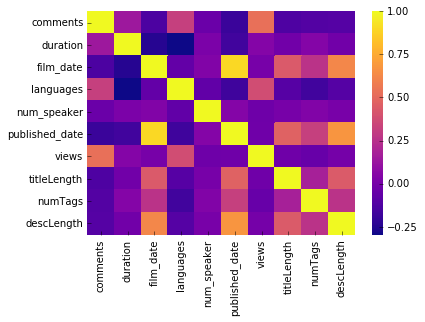

In [15]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "plasma")

In [ ]:
# Size of audience tedX
# Group details
# Positive, Negative and Moderate
# Occupation group
# Published Date